In [3]:
import pandas as pd
df=pd.DataFrame()

In [5]:
df=pd.read_csv('chandi mandir.csv',index_col='date',parse_dates=True)

FileNotFoundError: [Errno 2] No such file or directory: 'chandi mandir.csv'

<Axes: xlabel='date'>

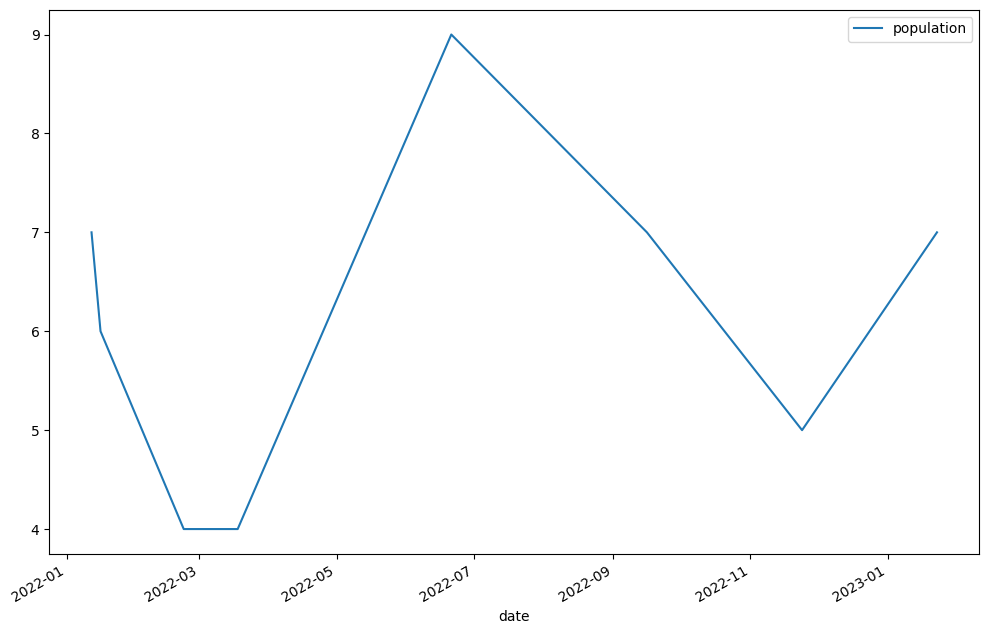

In [40]:
df.columns = ['population']
df.plot(figsize=(12,8))

In [41]:
df['population_LastMonth']=df['population'].shift(+1)
df['population_2Monthsback']=df['population'].shift(+2)
df['population_3Monthsback']=df['population'].shift(+3)
df

,population,population_LastMonth,population_2Monthsback,population_3Monthsback
date,,,,
2022-01-16,6.0,NaN,NaN,NaN
2022-02-22,4.0,6.0,NaN,NaN
2022-03-18,4.0,4.0,6.0,NaN
2022-06-21,9.0,4.0,4.0,6.0
2022-09-16,7.0,9.0,4.0,4.0
2022-11-24,5.0,7.0,9.0,4.0
2022-01-12,7.0,5.0,7.0,9.0
2023-01-23,7.0,7.0,5.0,7.0
NaT,NaN,7.0,7.0,5.0


In [42]:
df=df.dropna()
df

,population,population_LastMonth,population_2Monthsback,population_3Monthsback
date,,,,
2022-06-21,9.0,4.0,4.0,6.0
2022-09-16,7.0,9.0,4.0,4.0
2022-11-24,5.0,7.0,9.0,4.0
2022-01-12,7.0,5.0,7.0,9.0
2023-01-23,7.0,7.0,5.0,7.0


In [43]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [44]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)


In [45]:
import numpy as np
x1,x2,x3,y=df['population_LastMonth'],df['population_2Monthsback'],df['population_3Monthsback'],df['population']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[4. 4. 6.]
 [9. 4. 4.]
 [7. 9. 4.]
 [5. 7. 9.]
 [7. 5. 7.]]


In [46]:
X_train,X_test,y_train,y_test=final_x[1:14],final_x[1:14],y[1:16],y[1:16]
print(X_train.shape)
print(y_train.shape)

(4, 3)
(4, 1)


In [47]:
lin_model.fit(X_train,y_train)

LinearRegression()

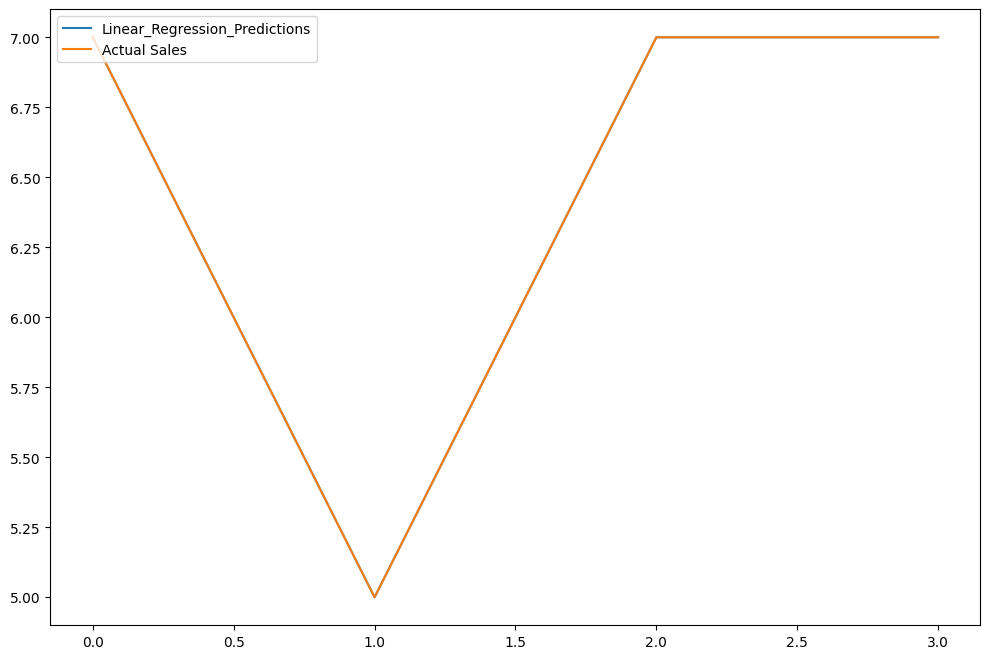

In [48]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual sales')
plt.legend(loc="upper left")
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [50]:
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Linear Regression Model is: 7.944109290391274e-15
